ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 6. Classificação com Gradient Boosting
Treine um modelo de Gradient Boosting no conjunto de dados Breast Cancer.

Compare o desempenho utilizando a métrica ROC-AUC e a curva ROC.

In [5]:
# Conjunto de Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dados = pd.read_csv("data/breast-cancer.csv")            # lendo o .csv

In [7]:
dados.head()            # vendo o cabeçalho do .csv

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
colunas = dados.columns
dados.dtypes                    # descobrindo os tipos das colunas (certificando de todos serem numéricos)

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

Normalizando os dados

In [9]:
from sklearn.preprocessing import MinMaxScaler          # importação do sklearn para usar MinMax

In [10]:
normalizador = MinMaxScaler(feature_range=(0,1))            # função MinMax para criação de um normalizador

In [11]:
# Normalização dos valores para entre -1 e 1

colunas_para_normalizar = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

In [12]:
dados.head()            # após a normalização

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0


Separando em amostra de treino e teste

In [13]:
from sklearn.model_selection import train_test_split            # importação do "train_test_split" do sklearn para realizar o treinamento

In [14]:
X = dados[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']].values  # ('diabetes' é a coluna alvo)

Y = dados['diagnosis'].values  # Variável alvo

In [15]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

Aplicando modelo GB (Gradient Boosting)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
modelo_GB = GradientBoostingClassifier()

In [18]:
modelo_GB.fit(X_treino, Y_treino)          # treinamento do modelo

GradientBoostingClassifier()

In [19]:
# Realizando previsões na amostra de teste
Y_previsto = modelo_GB.predict(X_teste)

# RESULTADOS FINAIS (ROC-AUC e ROC CURVE)

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
# Cálculo curva ROC
roc_auc = roc_auc_score(Y_teste, Y_previsto)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.94


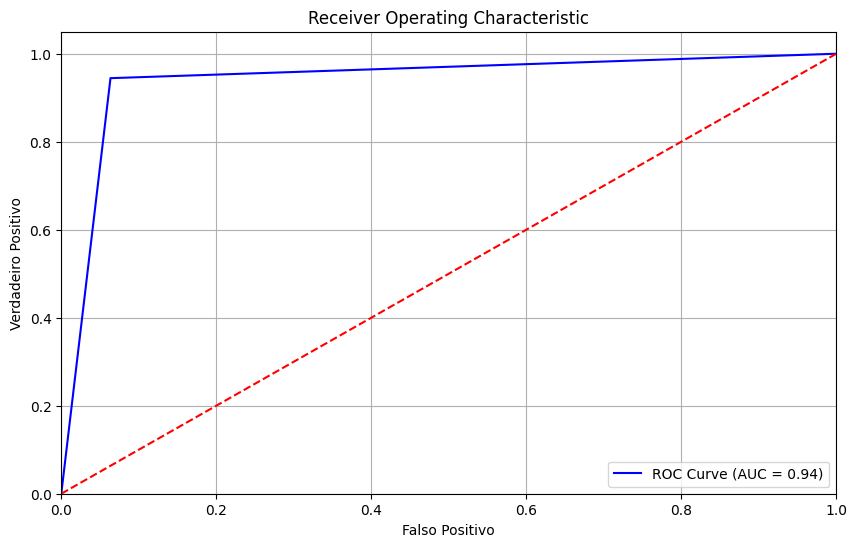

In [24]:
# Gráfico da curva ROC:
fpr, tpr, thresholds = roc_curve(Y_teste, Y_previsto)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()